<a href="https://colab.research.google.com/github/brendaFlavia/DeepLearningAssignment/blob/main/Copy_of_LungOpacityFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import PIL.Image
import pathlib
import glob
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models, utils, losses, callbacks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, accuracy_score, roc_auc_score
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

import pathlib

#train and Validation data directory 
#train_data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/train_images') 

#test data directory
#test_data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/test_images') 

#train and Validation data directory 
train_data_dir = pathlib.Path('/content/gdrive/MyDrive/ChestOpacity/train_images') 

#path to data set two
data_set2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/Dataset2')

#path to unknown images labels
test_data_dir = pathlib.Path('/content/gdrive/MyDrive/ChestOpacity/test_images')

Mounted at /content/gdrive


In [3]:
img_width, img_height = 150,150
batch_size = 32

In [4]:
#dataset 2
test_dataset_2 = tf.keras.utils.image_dataset_from_directory(
  data_set2,
  shuffle=False,
  color_mode='rgb',
  image_size=(img_height, img_width),
  batch_size=224
  )

Found 224 files belonging to 2 classes.


In [5]:
# Define image data generators
# Train data


train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="training",
  color_mode='rgb',
  seed=123,
  label_mode='binary',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 715 files belonging to 2 classes.
Using 572 files for training.


In [6]:
# Validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='binary',
  color_mode='rgb',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 715 files belonging to 2 classes.
Using 143 files for validation.


In [7]:
#test dataset
test_data = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  shuffle=False,
  color_mode='rgb',
  image_size=(img_height, img_width),
  batch_size=50
  )


Found 50 files belonging to 1 classes.


In [8]:
# Load class names for the dataset
class_names = val_ds.class_names
print(class_names)

['normal', 'sick']


In [10]:
# Load class names for the dataset
class_names = train_ds.class_names
print(class_names)

['normal', 'sick']


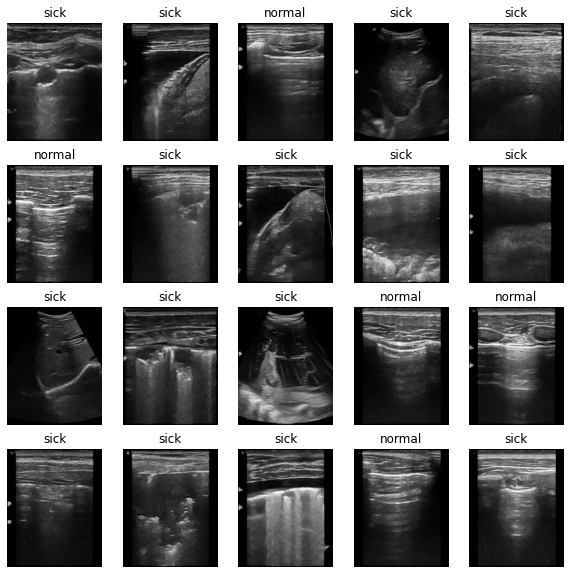

In [ ]:


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


Print shape of the images

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32, 1)


Normalise the images

In [9]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

Auto tune dataset for training

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset_2=test_dataset_2.cache().prefetch(buffer_size=AUTOTUNE)


In [12]:
#create a model
model = models.Sequential()

creat seguential model that uses rectified linear activation function. output the input directly if it is positive, otherwise, it will output zero 

In [13]:
#num_classes = num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu',input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(2)
])

use loss function SparseCategoricalCrossentropy because it Computes the crossentropy loss between the labels and predictions

In [14]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [15]:
result=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
)

Epoch 1/10
18/18 [==============================] - 179s 5s/step - loss: 0.5489 - accuracy: 0.7587 - val_loss: 0.2920 - val_accuracy: 0.8601
Epoch 2/10
18/18 [==============================] - 0s 21ms/step - loss: 0.2286 - accuracy: 0.8969 - val_loss: 0.1440 - val_accuracy: 0.9510
Epoch 3/10
18/18 [==============================] - 0s 19ms/step - loss: 0.1308 - accuracy: 0.9493 - val_loss: 0.1118 - val_accuracy: 0.9580
Epoch 4/10
18/18 [==============================] - 0s 19ms/step - loss: 0.0773 - accuracy: 0.9720 - val_loss: 0.1358 - val_accuracy: 0.9301
Epoch 5/10
18/18 [==============================] - 0s 20ms/step - loss: 0.0444 - accuracy: 0.9878 - val_loss: 0.1897 - val_accuracy: 0.9301
Epoch 6/10
18/18 [==============================] - 0s 19ms/step - loss: 0.0333 - accuracy: 0.9930 - val_loss: 0.1160 - val_accuracy: 0.9510
Epoch 7/10
18/18 [==============================] - 0s 19ms/step - loss: 0.0149 - accuracy: 0.9965 - val_loss: 0.2033 - val_accuracy: 0.9371
Epoch 8/10
18

Check Accuracy on different datasets

In [16]:
#test dataset
test_loss, test_acc = model.evaluate(test_data)

1/1 [==============================] - 21s 21s/step - loss: 4.5017 - accuracy: 0.4800


In [17]:
#validation set
test_loss, test_acc = model.evaluate(val_ds)

5/5 [==============================] - 0s 8ms/step - loss: 0.1080 - accuracy: 0.9720


In [18]:
#train set
test_loss, test_acc = model.evaluate(train_ds)

18/18 [==============================] - 0s 8ms/step - loss: 0.0057 - accuracy: 1.0000


In [19]:
#dataset two
test_loss, test_acc = model.evaluate(test_dataset_2)

1/1 [==============================] - 101s 101s/step - loss: 5.2243 - accuracy: 0.4464


Visualize Training and Validation Loss and Accuracy

Text(0.5, 1.0, 'Training and Validation Accuracy')

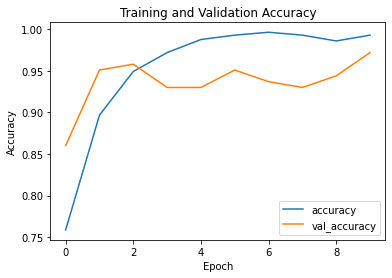

In [20]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

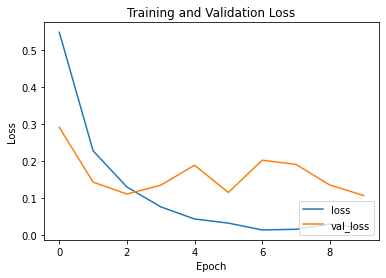

In [21]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

Make Predictions on Known Images Lables

Predictions:
 [1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1
 0 1 0 1 0 1 0 0 1 1 0 1 0]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


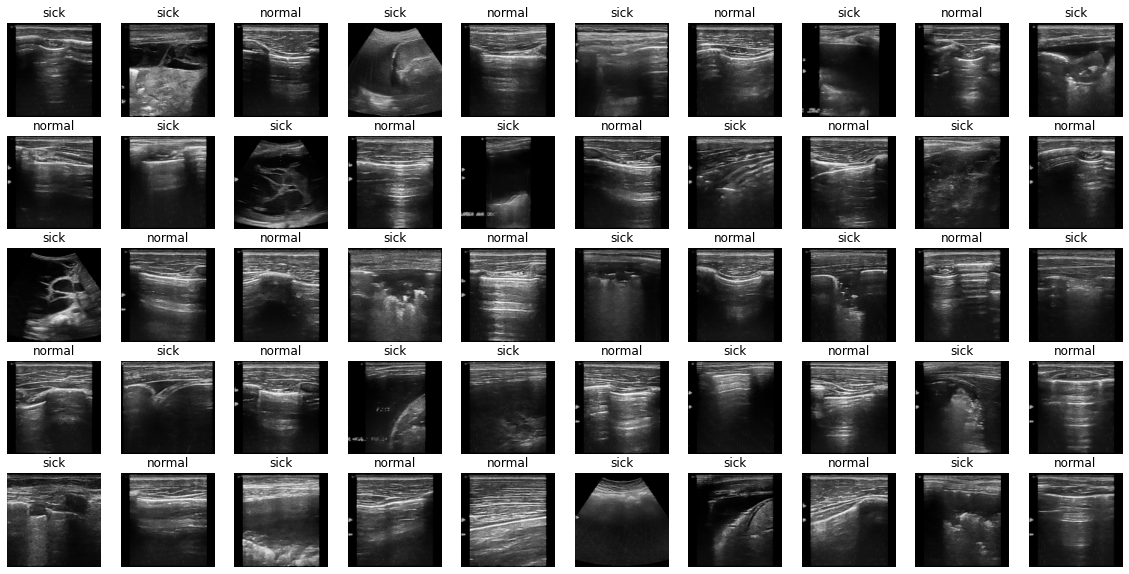

In [22]:
image_batch, label_batch = test_data.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

Confusion matrix on test data

In [23]:
y_pred = []  # storing predicted labels
y_true = []  # storing true labels

for image_batch, label_batch in test_dataset_2:
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm=confusion_matrix(predicted_labels, correct_labels)
#print (cm)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.47      0.89      0.62       112

    accuracy                           0.45       224
   macro avg       0.24      0.45      0.31       224
weighted avg       0.24      0.45      0.31       224



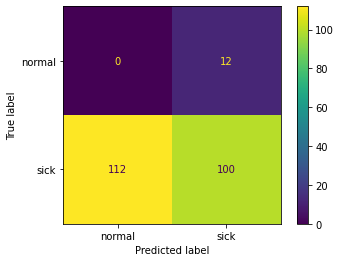

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()

plt.show()

Confusion matrik on Dataset two

In [ ]:
y_pred2 = []  # storing predicted labels
y_true2 = []  # storing true labels

for image_batch_2, label_batch_2 in test_dataset_2:
   # append true labels
   y_true2.append(label_batch_2)
   # compute predictions
   preds2 = model.predict(image_batch_2)
   # append predicted labels
   y_pred2.append(np.argmax(preds2, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels_2 = tf.concat([item for item in y_true2], axis = 0)
predicted_labels_2 = tf.concat([item for item in y_pred2], axis = 0)
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm_2=confusion_matrix(predicted_labels_2, correct_labels_2)

In [ ]:
print(classification_report(correct_labels_2, predicted_labels_2))

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2,display_labels=class_names)
disp.plot()

plt.show()

Apply Data Augumentation

In [26]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

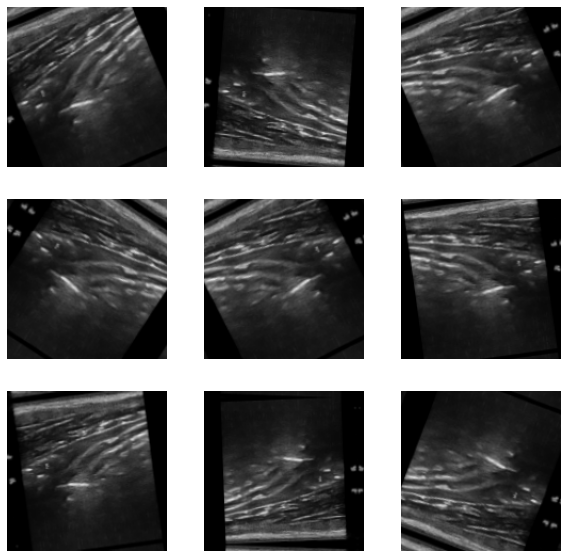

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [27]:
num_classes = num_classes = len(class_names)

model = tf.keras.Sequential([
    data_augmentation,
  tf.keras.layers.Rescaling(1./255,input_shape=(150, 150, 3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu' ),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [28]:
#complie model

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
#es=EarlyStopping(monitor='val_loss', mode='min',verbose=1)

In [29]:
#fit the model

epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
18/18 [==============================] - 2s 32ms/step - loss: 0.6955 - accuracy: 0.5647 - val_loss: 0.5923 - val_accuracy: 0.6573
Epoch 2/15
18/18 [==============================] - 0s 22ms/step - loss: 0.5336 - accuracy: 0.7308 - val_loss: 0.4486 - val_accuracy: 0.8182
Epoch 3/15
18/18 [==============================] - 0s 21ms/step - loss: 0.4710 - accuracy: 0.7780 - val_loss: 0.4263 - val_accuracy: 0.8182
Epoch 4/15
18/18 [==============================] - 0s 22ms/step - loss: 0.3854 - accuracy: 0.8339 - val_loss: 0.2870 - val_accuracy: 0.8881
Epoch 5/15
18/18 [==============================] - 0s 21ms/step - loss: 0.3103 - accuracy: 0.8654 - val_loss: 0.2709 - val_accuracy: 0.8811
Epoch 6/15
18/18 [==============================] - 0s 22ms/step - loss: 0.2567 - accuracy: 0.8829 - val_loss: 0.2358 - val_accuracy: 0.9021
Epoch 7/15
18/18 [==============================] - 0s 22ms/step - loss: 0.2282 - accuracy: 0.9108 - val_loss: 0.3178 - val_accuracy: 0.8811
Epoch 8/15
18

Test **accuracy** Images

In [30]:
#test dataset
test_loss, test_acc = model.evaluate(test_data, verbose=2)

1/1 - 0s - loss: 1.3257 - accuracy: 0.7200 - 127ms/epoch - 127ms/step


In [31]:
#train dataset
test_loss, test_acc = model.evaluate(train_ds, verbose=2)

18/18 - 0s - loss: 0.8809 - accuracy: 0.8234 - 131ms/epoch - 7ms/step


In [32]:
#validation dataset
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

5/5 - 0s - loss: 0.7676 - accuracy: 0.8252 - 45ms/epoch - 9ms/step


In [33]:
#dataset two
test_loss, test_acc = model.evaluate(test_dataset_2)

1/1 [==============================] - 0s 50ms/step - loss: 2.3023 - accuracy: 0.6429


Visualize Training an validation Results

Text(0.5, 1.0, 'Training and Validation Accuracy')

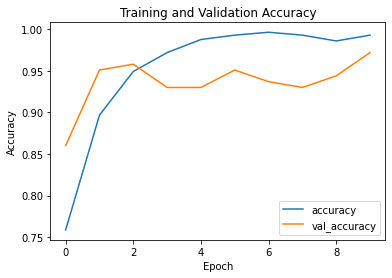

In [38]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

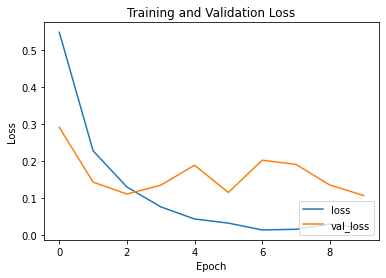

In [39]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

Classify Unknown Images

Predictions:
 [0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 0]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


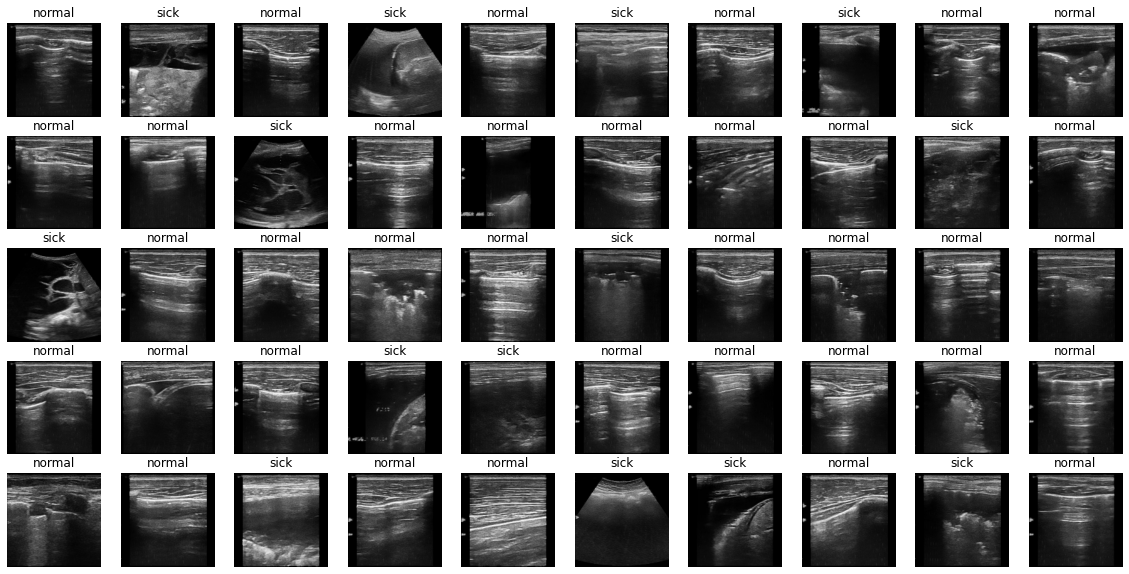

In [36]:
image_batch, label_batch = test_data.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [43]:
#Path to CSV result
csv_data2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/image_results8.csv')

In [44]:
# display the array
print(predictions.numpy())
  
# convert array into dataframe
DF = pd.DataFrame(predictions)
  
# save the dataframe as a csv file
DF.to_csv(csv_data2)

[0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 0]


Classification Matric for Dataet two

In [40]:
y_pred = []  # storing predicted labels
y_true = []  # storing true labels

for image_batch, label_batch in test_dataset_2:
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm=confusion_matrix(predicted_labels, correct_labels)

In [41]:
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.70      0.51      0.59       112
           1       0.61      0.78      0.69       112

    accuracy                           0.64       224
   macro avg       0.65      0.64      0.64       224
weighted avg       0.65      0.64      0.64       224



Confusion Matrik

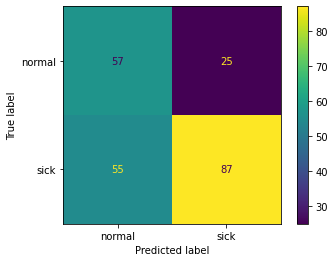

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()

plt.show()